In [71]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.integrate import odeint

In [72]:
def velocity(x,H):
    return H*x

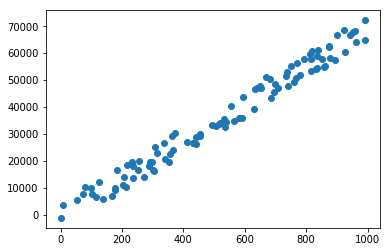

In [73]:
data=np.genfromtxt("galaxies.dat")

plt.scatter(data[:,0],data[:,1])

<ErrorbarContainer object of 3 artists>

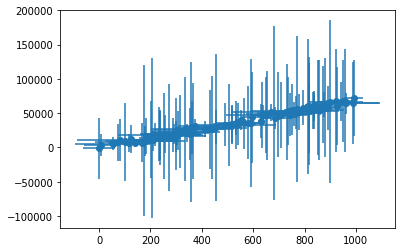

In [82]:
#Converting Data to kg.m.s units

x=data[:,0]
y=data[:,1]


#Since we are not given the error
#Generate the x and y error from a normal distribution with standard deviations of 50 and 10000

error_y=50000*(np.random.normal(0,1,size=len(x)))
error_x=80*(np.random.normal(0,1,size=len(x)))

plt.errorbar(x,y,xerr=error_x,yerr=error_y,marker='o', fmt='o')


In [83]:
#This function performs Monte Carlo Fitting as a function of N, the number of iterations
#returns the median and standard deviation of the parameter H

def MonteCarloFit(N):
    H=[]

    for i in range(N):
        x_i=x+(np.random.random()-0.5)*2.0*error_x
        y_i=y+(np.random.random()-0.5)*2.0*error_y
    
        popt,pcov=curve_fit(velocity,x_i,y_i)
        H=np.append(H,popt[0])
    
    #taking the median and standard deviation of parameters from the fitting
    med_H=np.median(H)
    std_H=np.std(H)

    
    return [med_H,std_H]


#Perform the fit with N=100
par_100=MonteCarloFit(100)

In [106]:
H_avg=par_100[0]
H_std=par_100[1]

print(par_100)

[67.6695083740423, 4.215235697619593]


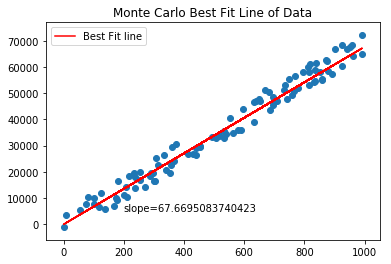

In [103]:
#Plotting the Best fit line from Monte Carlo Fit with N=100
plt.plot(x,velocity(x,H_avg),label="Best Fit line", color="red")


plt.title("Monte Carlo Best Fit Line of Data")
plt.text(200,5000,"slope="+str(H_avg))
plt.scatter(x,y)
plt.legend()
plt.show()



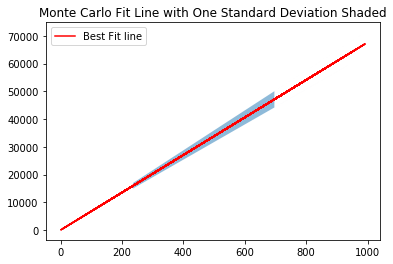

In [104]:
#Plotting the Best fit line from Monte Carlo Fit with N=100
plt.plot(x,velocity(x,H_avg),label="Best Fit line", color="red")

#Fill between one standard deviation from the best fit line
above=[H_avg+H_std]
below=[H_avg-H_std]

plt.fill_between(x,velocity(x,above),velocity(x,below), alpha=0.5)
plt.title("Monte Carlo Fit Line with One Standard Deviation Shaded")
plt.legend()
plt.show()

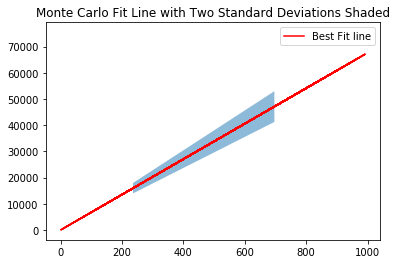

In [105]:
#Plotting the Best fit line from Monte Carlo Fit with N=100
plt.plot(x,velocity(x,H_avg),label="Best Fit line", color="red")

#Fill between two standard deviation from the best fit line
above=[H_avg+2*H_std]
below=[H_avg-2*H_std]

plt.fill_between(x,velocity(x,above),velocity(x,below), alpha=0.5)
plt.title("Monte Carlo Fit Line with Two Standard Deviations Shaded")
plt.legend()
plt.show()

In [107]:
#H is currently in units of km/parsec/s

parsec=3.086e+13  #parsecs per kilometer

H_avg=H_avg/parsec
H_std=H_std/parsec

ageofUniverse=1/H_avg
print(ageofUniverse)
print("The age of the universe calculated from this Hubble constant fit is 4.49e11 seconds old")


456039961594.2496
The age of the universe calculated from this Hubble constant fit is 4.49e11 seconds old
